In [5]:
import zipfile
import os

# ZIP dosyanın Colab içindeki yolu (Dosyanı yüklediğin yer burası olmalı)
zip_path = "/content/drive/MyDrive/Beyin_Verileri_Teknofest_2021/beyin_verileri.zip"

# ZIP dosyasını çıkaracağımız hedef klasör
extract_path = "/content/beyin_verileri"

# ZIP dosyasını çıkar
with zipfile.ZipFile(zip_path, 'r') as zip_ref:
    zip_ref.extractall(extract_path)  # Kendi klasörünü oluştur

print("ZIP dosyası çıkarıldı.")

# Çıkarılan klasör içeriğini kontrol et
print(os.listdir(extract_path))
print("Train klasörü:", os.listdir(os.path.join(extract_path, "train")))
print("Val klasörü:", os.listdir(os.path.join(extract_path, "val")))
print("Test klasörü:", os.listdir(os.path.join(extract_path, "test")))

ZIP dosyası çıkarıldı.
['train', 'val', 'test']
Train klasörü: ['inme_var', 'inme_yok']
Val klasörü: ['inme_var', 'inme_yok']
Test klasörü: ['inme_var', 'inme_yok']


In [7]:
import os

def count_images_in_folders(root_folder):
    for dataset_type in ['train', 'val', 'test']:
        dataset_path = os.path.join(root_folder, dataset_type)
        for class_name in ['inme_var', 'inme_yok']:
            class_path = os.path.join(dataset_path, class_name)
            if os.path.exists(class_path):
                num_images = len([f for f in os.listdir(class_path) if os.path.isfile(os.path.join(class_path, f))])
                print(f"{dataset_type} - {class_name}: {num_images} görüntü")

# Çıkarılan zip dosyasının ana klasörünü belirtin
extract_folder = '/content/beyin_verileri'
count_images_in_folders(extract_folder)


train - inme_var: 1556 görüntü
train - inme_yok: 3098 görüntü
val - inme_var: 333 görüntü
val - inme_yok: 664 görüntü
test - inme_var: 334 görüntü
test - inme_yok: 665 görüntü


In [8]:
import numpy as np
import cv2
import os
import tensorflow as tf
from tensorflow.keras.applications import EfficientNetB6
from tensorflow.keras.applications.efficientnet import preprocess_input

# EfficientNetB6 için uygun görüntü boyutu
img_size = (512, 512)

# Veri yükleme fonksiyonu (EfficientNetB6 için)
def load_dataset_b6(dataset_type="train", limit=None):
    X, Y = [], []
    classes = ["inme_var", "inme_yok"]

    dataset_path = f"/content/beyin_verileri/{dataset_type}"

    if not os.path.exists(dataset_path):
        raise FileNotFoundError(f"Dataset path '{dataset_path}' not found!")

    for label, class_name in enumerate(classes):
        class_path = os.path.join(dataset_path, class_name)

        if not os.path.exists(class_path):
            print(f"Warning: Class path '{class_path}' not found! Skipping...")
            continue

        image_files = [os.path.join(class_path, f) for f in os.listdir(class_path) if f.endswith('.png')]

        if not image_files:
            print(f"Warning: No images found in {class_path}")

        if limit:
            image_files = image_files[:limit]

        print(f"Loading {len(image_files)} images from {class_path}...")

        for file in image_files:
            img = cv2.imread(file, cv2.IMREAD_GRAYSCALE)

            if img is None:
                print(f"Warning: Could not read image {file}. Skipping...")
                continue

            # Gri tonlamalıyı 3 kanallıya çevir
            img = cv2.cvtColor(img, cv2.COLOR_GRAY2RGB)

            # EfficientNetB6 boyutuna yeniden boyutlandır
            img = cv2.resize(img, img_size)

            # EfficientNet’in preprocess_input fonksiyonu ile -1 ile 1 arasına normalizasyon yap
            img = preprocess_input(img.astype(np.float32))

            X.append(img)
            Y.append(label)

    print(f"Finished loading {len(X)} images for {dataset_type} dataset.")
    return np.array(X, dtype=np.float32), np.array(Y, dtype=np.int32)

# EfficientNetB6 için Train, Validation ve Test veri setlerini yükleme
print("Loading training dataset...")
X_train_b6, Y_train_b6 = load_dataset_b6("train")
print("Loading validation dataset...")
X_val_b6, Y_val_b6 = load_dataset_b6("val")
print("Loading test dataset...")
X_test_b6, Y_test_b6 = load_dataset_b6("test")

# Veri boyutlarını kontrol et
print(f"Train Set: {X_train_b6.shape}, Labels: {Y_train_b6.shape}")
print(f"Validation Set: {X_val_b6.shape}, Labels: {Y_val_b6.shape}")
print(f"Test Set: {X_test_b6.shape}, Labels: {Y_test_b6.shape}")

# npy dosyalarını kaydetme
np.save("/content/drive/MyDrive/X_train_b6.npy", X_train_b6)
np.save("/content/drive/MyDrive/Y_train_b6.npy", Y_train_b6)
np.save("/content/drive/MyDrive/X_val_b6.npy", X_val_b6)
np.save("/content/drive/MyDrive/Y_val_b6.npy", Y_val_b6)
np.save("/content/drive/MyDrive/X_test_b6.npy", X_test_b6)
np.save("/content/drive/MyDrive/Y_test_b6.npy", Y_test_b6)

print("Datasets saved successfully to Google Drive.")


Loading training dataset...
Loading 1556 images from /content/beyin_verileri/train/inme_var...
Loading 3098 images from /content/beyin_verileri/train/inme_yok...
Finished loading 4654 images for train dataset.
Loading validation dataset...
Loading 333 images from /content/beyin_verileri/val/inme_var...
Loading 664 images from /content/beyin_verileri/val/inme_yok...
Finished loading 997 images for val dataset.
Loading test dataset...
Loading 334 images from /content/beyin_verileri/test/inme_var...
Loading 665 images from /content/beyin_verileri/test/inme_yok...
Finished loading 999 images for test dataset.
Train Set: (4654, 512, 512, 3), Labels: (4654,)
Validation Set: (997, 512, 512, 3), Labels: (997,)
Test Set: (999, 512, 512, 3), Labels: (999,)
Datasets saved successfully to Google Drive.


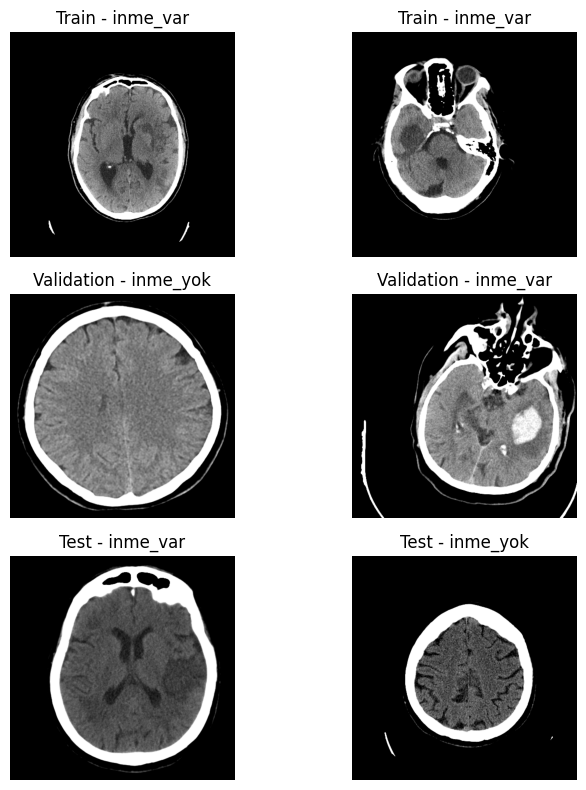

In [10]:
import numpy as np
import matplotlib.pyplot as plt

# Veri kümeleri ve etiketleri tanımlama
datasets = {
    "Train": (X_train_b6, Y_train_b6),
    "Validation": (X_val_b6, Y_val_b6),
    "Test": (X_test_b6, Y_test_b6)
}

# Örnek görüntü sayısı
num_samples = 2

# Görüntüleri gösterme
fig, axes = plt.subplots(len(datasets), num_samples, figsize=(8, 8))

for row, (name, (X, Y)) in enumerate(datasets.items()):
    indices = np.random.choice(len(X), num_samples, replace=False)

    for col, idx in enumerate(indices):
        img = X[idx]
        label = "inme_var" if Y[idx] == 0 else "inme_yok"  # Sınıfları uygun şekilde etiketleme

        ax = axes[row, col]
        ax.imshow(img.astype(np.uint8))
        ax.set_title(f"{name} - {label}")
        ax.axis('off')

plt.tight_layout()
plt.show()


In [4]:
import numpy as np
import os

# Veri dizini
data_path = "/content/drive/MyDrive/efficientb6_NPY"

# NumPy dosyalarını yükleme
X_train = np.load(os.path.join(data_path, "X_train_b6.npy"))
y_train = np.load(os.path.join(data_path, "Y_train_b6.npy"))

X_val = np.load(os.path.join(data_path, "X_val_b6.npy"))
y_val = np.load(os.path.join(data_path, "Y_val_b6.npy"))

X_test = np.load(os.path.join(data_path, "X_test_b6.npy"))
y_test = np.load(os.path.join(data_path, "Y_test_b6.npy"))

# Veri boyutlarını ekrana yazdırma
print(f"Train set: X={X_train.shape}, y={y_train.shape}")
print(f"Validation set: X={X_val.shape}, y={y_val.shape}")
print(f"Test set: X={X_test.shape}, y={y_test.shape}")


Train set: X=(4654, 512, 512, 3), y=(4654,)
Validation set: X=(997, 512, 512, 3), y=(997,)
Test set: X=(999, 512, 512, 3), y=(999,)


In [2]:
import tensorflow as tf
from tensorflow.keras.applications import EfficientNetB6
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Dense, BatchNormalization, GlobalAveragePooling2D, Dropout
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.callbacks import EarlyStopping, ModelCheckpoint
from tensorflow.keras.metrics import Precision, Recall
from sklearn.utils.class_weight import compute_class_weight
import numpy as np
from tensorflow.keras.callbacks import ReduceLROnPlateau

# Train dataset sınıf sayıları (manuel girildi)
num_samples = {'inme_var': 1556, 'inme_yok': 3098}
total_samples = num_samples['inme_var'] + num_samples['inme_yok']

# Class weight hesaplama
class_weight = {
    0: total_samples / (2 * num_samples['inme_var']),  # "inme var" için ağırlık
    1: total_samples / (2 * num_samples['inme_yok'])   # "inme yok" için ağırlık
}

# EfficientNetB6 modelini yükle
base_model = EfficientNetB6(weights='imagenet', include_top=False, input_shape=(512, 512, 3))

# İlk 350 katmanı dondur
for layer in base_model.layers[:400]:
    layer.trainable = False

# Sonraki katmanları eğitilebilir yap
for layer in base_model.layers[400:]:
    layer.trainable = True

# Yeni katmanlar ekleme
x = base_model.output
x = GlobalAveragePooling2D()(x)
x = BatchNormalization()(x)
x = Dense(256, activation='relu')(x)
x = BatchNormalization()(x)
x = Dropout(0.5)(x)
x = Dense(128, activation='relu')(x)
x = BatchNormalization()(x)
x = Dropout(0.4)(x)

# Çıkış katmanı
output_layer = Dense(1, activation='sigmoid')(x)

# Modeli oluştur
model = Model(inputs=base_model.input, outputs=output_layer)

# Modeli derleme
model.compile(optimizer=Adam(learning_rate=0.0001),
              loss='binary_crossentropy',
              metrics=['accuracy', Precision(), Recall()])

# Callbacks: EarlyStopping ve ModelCheckpoint
early_stopping = EarlyStopping(monitor='val_loss', patience=5, restore_best_weights=True)
model_checkpoint = ModelCheckpoint(
    filepath="/content/drive/MyDrive/Model_Kayitlar/EfficientNetB6/EfficientB6_best_model.keras",
    monitor='val_loss',
    save_best_only=True,
    save_weights_only=False,
    mode='min',
    verbose=1
)
# ReduceLROnPlateau callback
reduce_lr = ReduceLROnPlateau(
    monitor='val_loss',  # Val loss'u takip et
    factor=0.5,          # Öğrenme oranını yarıya düşür
    patience=3,          # 3 epoch boyunca iyileşme olmazsa azalt
    min_lr=1e-7,         # Minimum öğrenme oranı
    verbose=1
)

# Callback'lere ekle
callbacks = [early_stopping, model_checkpoint, reduce_lr]

# Model özeti
model.summary()

Model: "functional"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┓
┃ Layer (type)              ┃ Output Shape           ┃        Param # ┃ Connected to           ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━┩
│ input_layer (InputLayer)  │ (None, 512, 512, 3)    │              0 │ -                      │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ rescaling (Rescaling)     │ (None, 512, 512, 3)    │              0 │ input_layer[0][0]      │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ normalization             │ (None, 512, 512, 3)    │              7 │ rescaling[0][0]        │
│ (Normalization)           │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ rescaling_1 (Rescaling)   │ (None, 512, 512, 3)    │              0 │ normalization[0][0]    │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ stem_conv_pad             │ (None, 513, 513, 3)    │              0 │ rescaling_1[0][0]      │
│ (ZeroPadding2D)           │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ stem_conv (Conv2D)        │ (None, 256, 256, 56)   │          1,512 │ stem_conv_pad[0][0]    │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ stem_bn                   │ (None, 256, 256, 56)   │            224 │ stem_conv[0][0]        │
│ (BatchNormalization)      │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ stem_activation           │ (None, 256, 256, 56)   │              0 │ stem_bn[0][0]          │
│ (Activation)              │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ block1a_dwconv            │ (None, 256, 256, 56)   │            504 │ stem_activation[0][0]  │
│ (DepthwiseConv2D)         │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ block1a_bn                │ (None, 256, 256, 56)   │            224 │ block1a_dwconv[0][0]   │
│ (BatchNormalization)      │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ block1a_activation        │ (None, 256, 256, 56)   │              0 │ block1a_bn[0][0]       │
│ (Activation)              │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ block1a_se_squeeze        │ (None, 56)             │              0 │ block1a_activation[0]… │
│ (GlobalAveragePooling2D)  │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ block1a_se_reshape        │ (None, 1, 1, 56)       │              0 │ block1a_se_squeeze[0]… │
│ (Reshape)                 │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ block1a_se_reduce         │ (None, 1, 1, 14)       │            798 │ block1a_se_reshape[0]… │
│ (Conv2D)                  │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ block1a_se_expand    

 Total params: 41,594,000 (158.67 MB)

 Trainable params: 35,787,133 (136.52 MB)

 Non-trainable params: 5,806,867 (22.15 MB)

In [5]:
# Model eğitimi
model.fit(
    X_train, y_train,
    validation_data=(X_val, y_val),  # Parantez içinde olmalı
    epochs=1000,
    callbacks=callbacks,
    class_weight=class_weight,# Class weight eklendi
    batch_size=32,
    verbose=1

)


Epoch 1/1000
146/146 ━━━━━━━━━━━━━━━━━━━━ 0s 833ms/step - accuracy: 0.6554 - loss: 0.7147 - precision: 0.8069 - recall: 0.6313
Epoch 1: val_loss improved from inf to 0.39562, saving model to /content/drive/MyDrive/Model_Kayitlar/EfficientNetB6/EfficientB6_best_model.keras
146/146 ━━━━━━━━━━━━━━━━━━━━ 350s 1s/step - accuracy: 0.6559 - loss: 0.7137 - precision: 0.8073 - recall: 0.6318 - val_accuracy: 0.8756 - val_loss: 0.3956 - val_precision: 0.8994 - val_recall: 0.9157 - learning_rate: 1.0000e-04
Epoch 2/1000
146/146 ━━━━━━━━━━━━━━━━━━━━ 0s 208ms/step - accuracy: 0.8731 - loss: 0.3072 - precision: 0.9387 - recall: 0.8626
Epoch 2: val_loss improved from 0.39562 to 0.19415, saving model to /content/drive/MyDrive/Model_Kayitlar/EfficientNetB6/EfficientB6_best_model.keras
146/146 ━━━━━━━━━━━━━━━━━━━━ 40s 270ms/step - accuracy: 0.8732 - loss: 0.3071 - precision: 0.9387 - recall: 0.8627 - val_accuracy: 0.9338 - val_loss: 0.1942 - val_precision: 0.9284 - val_recall: 0.9759 - learning_rate: 1.0

32/32 ━━━━━━━━━━━━━━━━━━━━ 33s 1s/step - accuracy: 0.9561 - loss: 0.1596 - precision: 0.6359 - recall: 0.6913
Test Accuracy: 0.9760
Test Loss: 0.0907
Test Precision: 0.9734
Test Recall: 0.9910
32/32 ━━━━━━━━━━━━━━━━━━━━ 31s 578ms/step


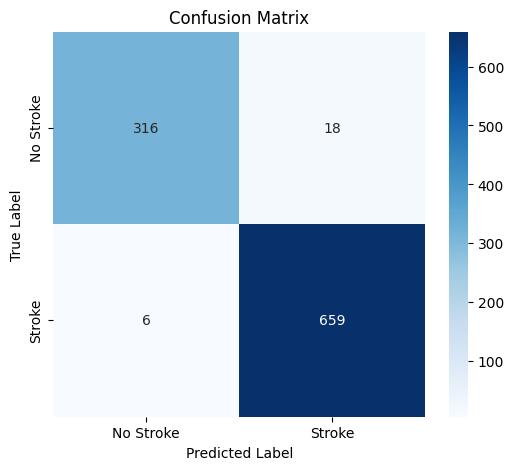


Classification Report:
              precision    recall  f1-score   support

   No Stroke       0.98      0.95      0.96       334
      Stroke       0.97      0.99      0.98       665

    accuracy                           0.98       999
   macro avg       0.98      0.97      0.97       999
weighted avg       0.98      0.98      0.98       999



In [6]:
import numpy as np
import tensorflow as tf
from sklearn.metrics import confusion_matrix, classification_report
import seaborn as sns
import matplotlib.pyplot as plt



# Test seti üzerinde modeli değerlendir
test_loss, test_acc, test_precision, test_recall = model.evaluate(X_test, y_test, verbose=1)

# Test sonuçlarını yazdır
print(f"Test Accuracy: {test_acc:.4f}")
print(f"Test Loss: {test_loss:.4f}")
print(f"Test Precision: {test_precision:.4f}")
print(f"Test Recall: {test_recall:.4f}")

# **Predictions ve Confusion Matrix**
y_pred = model.predict(X_test)
y_pred_classes = (y_pred > 0.5).astype(int)  # Sigmoid çıktı olduğu için 0.5 threshold kullanıyoruz

# Confusion Matrix oluştur
conf_matrix = confusion_matrix(y_test, y_pred_classes)

# **Confusion Matrix Görselleştir**
plt.figure(figsize=(6, 5))
sns.heatmap(conf_matrix, annot=True, fmt="d", cmap="Blues", xticklabels=["No Stroke", "Stroke"], yticklabels=["No Stroke", "Stroke"])
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.title("Confusion Matrix")
plt.show()

# **Classification Report Çıktısı**
print("\nClassification Report:")
print(classification_report(y_test, y_pred_classes, target_names=["No Stroke", "Stroke"]))
